## 4D equations using symbolics. 

In [1]:
using Symbolics
using LinearAlgebra
using Latexify
using Plots
using BenchmarkTools
using FileIO
using JLD2
using Base.Threads
#Pkg; Pkg.add("DistributedArrays")
println("nthreads = $(nthreads())")
using Printf

nthreads = 10


In [2]:
include("symbolics_ext.jl")


χaAB (generic function with 1 method)

In [3]:
D = Int64(4) #dimensions
L = (D+(D*(D+1)÷2))
println("D = $D, L = $L")
g = make_g(D)
ζ = rand(L)
p = ([1.0;1.0;1.0])

D = 4, L = 14


3-element Vector{Float64}:
 1.0
 1.0
 1.0

In [4]:
Φ_new(ζ,p)

-19.604679226277813

In [5]:
@variables vs[1:L] ps[1:3]
vst = [vs[i] for i ∈ 1:L]
vs_a = [vs[i] for i ∈ 1:D]
ΦaA = χaA(Φ_new(vs,ps),vs_a,vst);
ΦaA_exp = Symbolics.build_function(ΦaA,vs,ps);
ΦaA_f = eval(ΦaA_exp[1])

In [ ]:
@btime ΦaA_f(rand(L),p)

  36.343 μs (119 allocations: 3.52 KiB)


4×14 Matrix{Float64}:
  4.14863e7  -3.53729e6  -1.89206e7  …      -5.35988e5     -1.02394e6
 -3.53729e6  -7.58999e5   1.6789e6       48595.2        91569.9
 -1.89206e7   1.6789e6    7.78165e6     227325.0            5.02799e5
 -3.78571e7   3.30571e6   1.7696e7           5.02477e5      9.23785e5

btime: 36.343 μs (119 allocations: 3.52 KiB)

To test the plane-symmetric case we use the following vector: 

In [5]:
v_test = [zeros(L) for _ in 1:8]
v_test[1] = [2, 1, 0, 0, 3, 4, 0, 0, 5, 0, 0, 0, 0, 0]
v_test[2] = [4, 2, 0, 0, 3, 4, 0, 0, 5, 0, 0, 0, 0, 0] # para probar μ
v_test[3] = [2, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0] # ν
v_test[4] = [2, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0] # r
v_test[5] = [2, 1, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0] # τ
v_test[6] = [2, 1, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0] # ν, r
v_test[7] = [2, 1, 0, 0, 3, 0, 0, 0, 5, 0, 0, 0, 0, 0] # ν, τ
v_test[8] = [2, 1, 0, 0, 0, 4, 0, 0, 5, 0, 0, 0, 0, 0] # r, τ

14-element Vector{Int64}:
 2
 1
 0
 0
 0
 4
 0
 0
 5
 0
 0
 0
 0
 0

In [1]:
F_test = [zeros(D,L) for _ in 1:8]

p_test = ([-1.0;1.0;2.0])

UndefVarError: UndefVarError: D not defined

In [ ]:

for i in 1:8
   F_test[i] = ΦaA_f(v_test[i],p_test)
end

@show F_test

In [9]:
test = Dict("pars" => p_test, "v_test" => v_test, "F_test" => F_test)
file_name = "D4_test" * ".jld2"
#rm(file_name)


save(file_name, test)

In [10]:
data = load(file_name)
data

Dict{String, Any} with 3 entries:
  "F_test" => Any[#undef, #undef, #undef, #undef, #undef, #undef, #undef, #unde…
  "v_test" => Any[[2, 1, 0, 0, 3, 4, 0, 0, 5, 0, 0, 0, 0, 0], [4, 2, 0, 0, 3, 4…
  "pars"   => [-1.0, 1.0, 2.0]

In [ ]:
ΦaAB = Symbolics.simplify(χaAB(Φ_new(vs,ps),vst));
ΦaAB_exp = Symbolics.build_function(ΦaAB,vs,ps);
ΦaAB_f = eval(ΦaAB_exp[1])


#18 (generic function with 1 method)

In [ ]:
ζ_t = zeros(L)
ζ_t[1] = 1.0  
ζ_t[2] = 0.10
#ζ_t[D + l_ind(1,1,D)] = 0.1 #00
#ζ_t[D + l_ind(1,2,D)] = 0.25 #01
#ζ_t[D + l_ind(2,2,D)] = 0.5 #11
#ζ_t[D + l_ind(3,3,D)] = 0.25
#ζ_t[D + l_ind(4,4,D)] = 0.25

#tr(g*vector_unpack(ζ_t)[2])
#vector_unpack(ζ_t)[2]
println(ζ_t)
println(make_vector_TF!(ζ_t))
tr(g*vector_unpack(ζ_t)[2])

[1.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


0.0

In [ ]:
@btime ΦaAB_f(rand(L),par_f)[1:(L-1),1:(L-1),2]

  47.158 ms (4475 allocations: 6.33 MiB)


13×13 Matrix{Float64}:
  17328.3    -11200.7    -2452.84    …  -1641.46    -311.116   -371.904
 -11200.7      6577.8     1549.83        1045.94     161.711    179.65
  -2452.84     1549.83    1585.01         179.65      92.7107   287.984
 -12509.4      7429.34    1491.38        1201.42     240.436    247.258
  -3684.59     2133.71     550.17         326.408    109.802     53.7005
   2068.14    -1351.37    -250.967   …   -200.375    -71.2412   -31.1222
    540.541    -250.967   -420.809        -31.1222   -29.6346   -52.165
   2926.29    -1641.46    -371.904       -218.627    -52.165    -34.6045
  -1241.68      836.149    219.829        144.463     42.422     17.5885
   -250.967     229.458    227.284         17.5885    17.6538    30.8806
  -1641.46     1045.94     179.65    …    125.716     30.8806    19.1906
   -311.116     161.711     92.7107        30.8806    34.2268    12.8456
   -371.904     179.65     287.984         19.1906    12.8456    33.1535

First time benchmark : 0.082950 seconds (4.47 k allocations: 6.334 MiB)
with simplify 47.158 ms (4475 allocations: 6.33 MiB)

In [ ]:
N = 1000
T = 1
ζ = ζ_t #[-1.0;0.0;0.001;0.001;0.01];
make_vector_TF!(ζ)
par_f = [-1.0,1.0,-1.0]
#par_f = [-1,-0.5,-20]
E = fill(0.0+0.0im,(L-1,N))
v = zeros(N)
for i in 1:N
    v[i] = (i-1)/(N-1)/1.01
    γ = 1.0 / sqrt(1.0 - v[i]^2)
    ζ[1] = γ / T
    ζ[2] = v[i] * γ / T
    #E[:,i]=eigvals(ΦaAB_f(ζ,par_f)[1:D,1:D,2], ΦaAB_f(ζ,par_f)[1:D,1:D,1])
    E[:,i]=eigvals(ΦaAB_f(ζ,par_f)[1:(L-1),1:(L-1),2], ΦaAB_f(ζ,par_f)[1:(L-1),1:(L-1),1])
    #E[:,i]=eigvals(inv(ΦaAB_f(ζ,par_f)[1:(L-1),1:(L-1),1])*ΦaAB_f(ζ,par_f)[1:(L-1),1:(L-1),2])
    #E[:,i]=eigvals(ΦaAB_f(ζ,par_f)[1:D,1:D,1])
    #E[:,i]=eigvals(ΦaAB_f(ζ,par_f)[1:(L-1),1:(L-1),1])
end

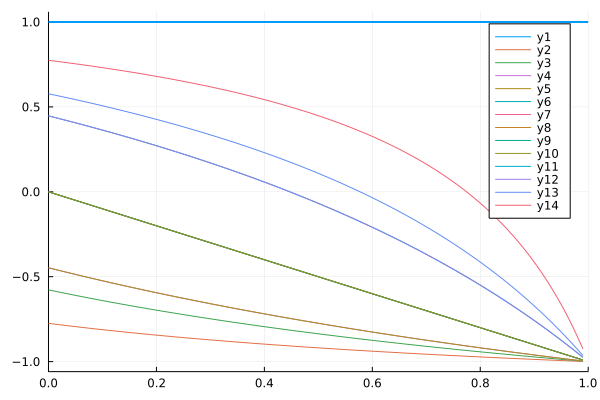

In [ ]:
one(x)=1
plt = plot(one,xlim=(0,1),legend=:topright, lw=2
#,legend=:bottomright
#, ylim = (-1,2)
)
for k in 1:(L-1)
    plot!(plt, v,real(E[k,:]))
end

plt